In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/day44-outlier-detection-using-percentiles/weight-height.csv')

In [ ]:
df.shape

(10000, 3)

In [ ]:
df.sample(10)

,Gender,Height,Weight
1909,Male,68.257047,185.646596
2130,Male,67.281527,174.974136
1387,Male,68.407848,177.110739
2769,Male,66.635115,170.372216
3860,Male,69.958719,188.787361
7800,Female,64.580207,126.432721
5595,Female,62.743055,135.352915
1552,Male,70.837159,201.403402
9365,Female,60.800942,120.529135
5733,Female,67.959814,175.353450


In [ ]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Count'>

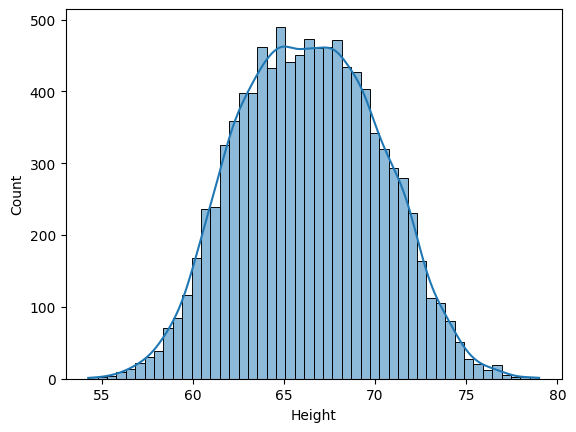

In [ ]:
sns.histplot(df['Height'], kde=True)

<Axes: xlabel='Height'>

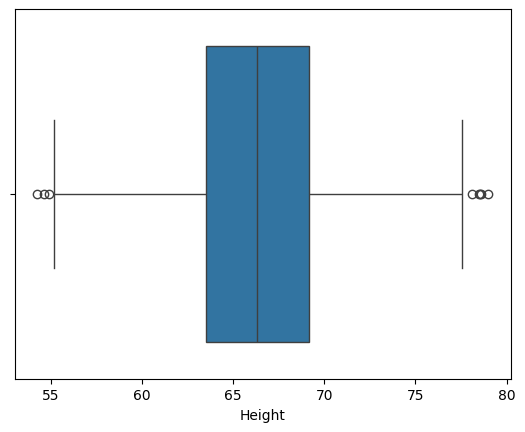

In [ ]:
# box-plot
sns.boxplot(x=df['Height'])

## Finding Outliers

In [ ]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [ ]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [ ]:
# Outliers
df[(df['Height'] >= 74.78) | (df['Height'] <=58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


## Outlier Treatment

### 1. Removing

In [ ]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >=58.13)]

In [ ]:
new_df.shape

(9799, 3)

In [ ]:
new_df['Height'].describe()

,Height
count,9799.000000
mean,66.363507
std,3.644267
min,58.134496
25%,63.577147
50%,66.317899
75%,69.119859
max,74.767447


In [ ]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='Height', ylabel='Count'>

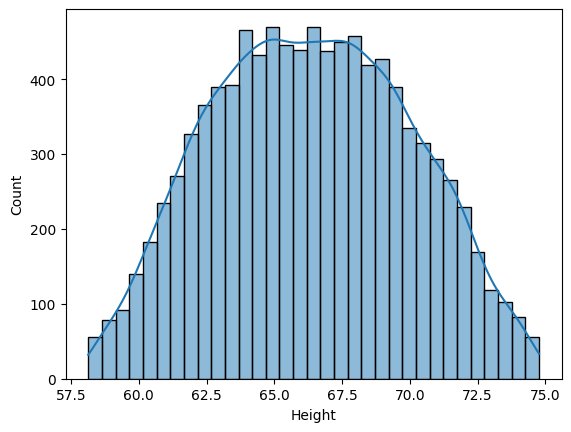

In [ ]:
sns.histplot(new_df['Height'], kde=True)

<Axes: xlabel='Height'>

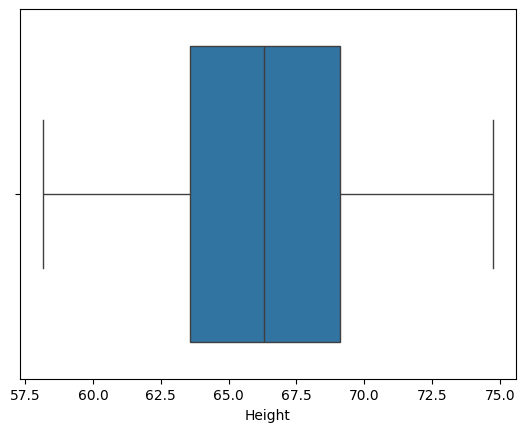

In [ ]:
sns.boxplot(x=new_df['Height'])

### 2. Capping

In [ ]:
# Capping (Also called Winsorization)

df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [ ]:
df.shape

(10000, 3)

In [ ]:
df.sample(10)

,Gender,Height,Weight
5441,Female,62.453816,132.697317
9556,Female,59.546612,99.313815
6452,Female,64.082865,133.451353
3881,Male,71.355902,203.376354
7840,Female,64.009873,127.955175
2830,Male,71.594926,197.887063
3791,Male,71.124286,196.278034
929,Male,62.709304,152.820468
6108,Female,63.085024,124.459625
3058,Male,66.687038,170.712230


In [ ]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.366281
std,3.795717
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.785790


<Axes: xlabel='Height', ylabel='Count'>

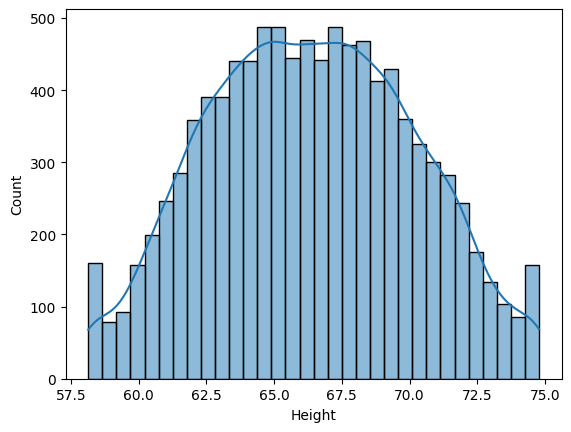

In [ ]:
sns.histplot(df['Height'], kde=True)

<Axes: xlabel='Height'>

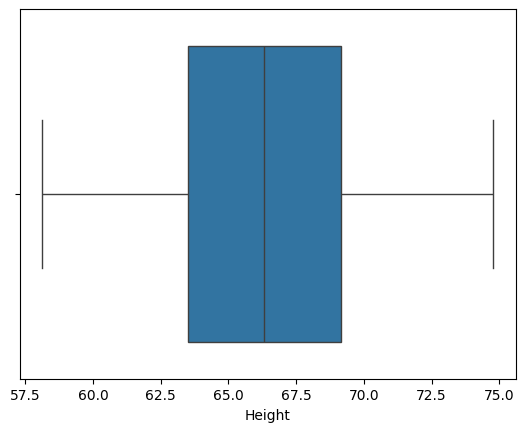

In [ ]:
sns.boxplot(x=df['Height'])